In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display

In [492]:
''' 
---------------------------------
# Code  Description
# ---------------------------------
# e	The value has been edited or estimated by USGS personnel.
# <	The Value is known to be less than reported value.
# >	The value is known to be greater than reported value.
# R	Records for these data have been revised.
# A	Approved for publication -- Processing and review completed.
# P	Provisional data subject to revision.
'''

' \n---------------------------------\n# Code  Description\n# ---------------------------------\n# e\tThe value has been edited or estimated by USGS personnel.\n# <\tThe Value is known to be less than reported value.\n# >\tThe value is known to be greater than reported value.\n# R\tRecords for these data have been revised.\n# A\tApproved for publication -- Processing and review completed.\n# P\tProvisional data subject to revision.\n'

In [493]:
file_name = 'Wall Steet Gage 2008 - 2015'
#file_name = 'Huron R Near New Hudson 2005 - 2014'
#file_name = 'Hamburg Rd Gage 2008 - 2015'

#time_period = 'august'
time_period = 'spring'

In [494]:
def CCDF_exceedance_flow(file_name, time_period):

    df = pd.read_csv(file_name + ".csv")

    df[["Year", "Month", "Day"]] = df["Datetime"].str.split("-", expand=True)

    time_period_data = df

    if (time_period == 'august'):
        time_period_data = df[df["Month"] == '08'].copy()

    else: #(time_period == 'spring'):
        years = ["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015"]
        
        start_date = '2008-04-15'
        end_date = '2008-06-30'
        df1 = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

        start_date = '2009-04-15'
        end_date = '2009-06-30'
        df2 = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

        start_date = '2010-04-15'
        end_date = '2010-06-30'
        df3 = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

        start_date = '2011-04-15'
        end_date = '2011-06-30'
        df4 = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]
        
        start_date = '2012-04-15'
        end_date = '2012-06-30'
        df5 = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

        start_date = '2013-04-15'
        end_date = '2013-06-30'
        df6 = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

        start_date = '2014-04-15'
        end_date = '2014-06-30'
        df7 = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

        start_date = '2015-04-15'
        end_date = '2015-06-30'
        df8 = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

        time_period_data = merged_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)
        

        ''' attempt to use for loop
        dataframes = {}

        i = 1
        for year in years:
            start_date = year + '-04-15'
            end_date = year + '-06-30'

            df = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)]

            dataframes[f'df{i}'] = df

            i += 1
            
        time_period_data = pd.concat(dataframes.values(), ignore_index=True)
        '''


    sorted_data = time_period_data.sort_values('Mean_CFS', ascending=False)

    time_period_data['ranked_column_m'] = sorted_data['Mean_CFS'].rank(method='first', ascending=False)

    df['numbered_col'] = range(1, len(df) + 1)
    
    print("ranked column m:", time_period_data['ranked_column_m'].head())
    print("mean values: ", time_period_data['Mean_CFS'].head())
    print("????", time_period_data['Mean_CFS'].rank(ascending=False))

    n = len(time_period_data)

    df['P_Value'] = range(1, len(df) + 1)

    P = 0
    time_period_data['P_Value'] = (time_period_data['ranked_column_m'] / (n + 1)) * 100
    print(time_period_data['P_Value'])
    # df = august_data
    # return df
    return(time_period_data)

In [495]:
df = CCDF_exceedance_flow(file_name, time_period)

ranked column m: 0    156.0
1    180.0
2    324.0
3    337.0
4    303.0
Name: ranked_column_m, dtype: float64
mean values:  0    1090.0
1    1010.0
2     642.0
3     606.0
4     697.0
Name: Mean_CFS, dtype: float64
???? 0      157.0
1      180.0
2      323.5
3      337.0
4      303.0
       ...  
611    151.5
612    124.0
613    107.5
614    153.0
615    171.5
Name: Mean_CFS, Length: 616, dtype: float64
0      25.283630
1      29.173420
2      52.512156
3      54.619125
4      49.108590
         ...    
611    24.473258
612    20.259319
613    17.504052
614    24.797407
615    28.038898
Name: P_Value, Length: 616, dtype: float64


In [496]:
#Plotting CCDF
def CCDF_plot(file_name, x, y):

    df = pd.read_csv(file_name + ".csv")

    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df[x], df[y], marker='o', linestyle='-')
    #plot scatter
    plt.title('CCDF of ' + file_name)
    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)') #P value
    plt.ylabel('Mean Daily Flow (cfs)')
    plt.grid(True)

    return plt.show()

In [497]:
#CCDF_plot(Aug_data, 'P_Value', 'Mean_CFS')

In [498]:
def CCDF_plot_P(df, x, y, P):
    df_sorted = df.sort_values(by='P_Value')
    # x = 'P_Value'
    # y = 'Mean_CFS'

    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df_sorted[x], df_sorted[y], marker='o', linestyle='-')


    # Interpolate the y-value where P_Value = 50
    #p_value = P
    if P in df_sorted[x].values:
        intersection_y = df_sorted[df_sorted[x] == P][y].values[0]
    else:
        intersection_y = np.interp(P, df_sorted[x], df_sorted[y])

    # Plot vertical line at P_Value = 50
    ax.axvline(x=P, color='blue', linestyle='--')

    # Add a horizontal line at the intersection point
    ax.axhline(y=intersection_y, color='green', linestyle='--')

    # Annotate the intersection point
    ax.annotate(f'{intersection_y:.2f}', xy=(P, intersection_y), xytext=(P + 1, intersection_y + 5),
                arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green')

    # Add scatter plot for individual points
    # ax.scatter(df_sorted[x], df_sorted[y], color='red')
    #plot scatter
    plt.title('CCDF of ' + file_name + " " + time_period + " with " + str(P) + " exceedance probability")
    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)') #P value
    plt.ylabel('Mean Daily Flow (cfs)')
    plt.grid(True)

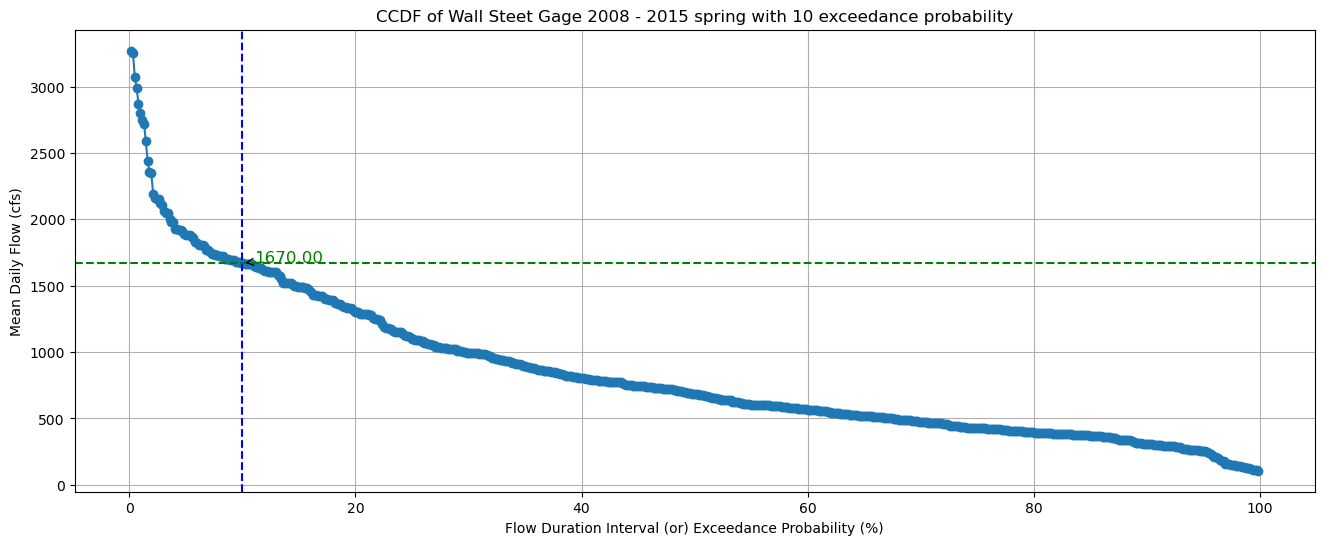

In [499]:
CCDF_plot_P(df, x='P_Value', y='Mean_CFS', P=10)